<br>
<h1><b><center>Green Taxi <font color="green"></center></b></h1><h5><center>Data Wizards Team </center></h5><br>

<img align="center" src="https://www1.nyc.gov/assets/tlc/images/content/pages/businesses/green-cab-markings.jpg" style="height:100px">

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To see all columns in a DataFrame
pd.options.display.max_columns = None

# To see all column content
pd.options.display.width = 0
pd.set_option('display.max_rows', 500)


<img align="left" src="https://www.smallbizdaily.com/wp-content/uploads/2019/10/shutterstock_422864347-1.jpg" style="height:200px"> 


<b><font color="red">The general idea</font></u></b><br>- Calculate the Trip Duration<br>- Calculate the Trip Fare based on the duration (Pipeline)<br>- Calculate the trip duration from district to district<br>- Customer click on the Source and Destination and he gets an estimate duration for his journy<br>- Visualize the traffic based on hourly bases

In [2]:
#### INTERNET EXAMPLE
# https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf
# https://towardsdatascience.com/how-taxis-arrive-at-fares-predicting-new-york-city-yellow-cab-fares-71a8c43b7c50

# Define the folder location of our dataset
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"

In [ ]:
# We will load all the data at the begining to plot it and see what we can do  with it
%timeit Green_Taxi = pd.read_csv(location+'2016_Green_Taxi_Trip_Data.csv')

#Green_Taxi = pd.read_csv(location+'Green_Taxi.csv')
#.drop(columns=['VendorID','Store_and_fwd_flag','RateCodeID','Passenger_count','MTA_tax','Ehail_fee','improvement_surcharge','Payment_type','PULocationID','DOLocationID','Extra','Tip_amount','Tolls_amount','Total_amount'])

<img align="left" src="https://deconstantin.com.au/wp-content/uploads/2014/02/timetoplan.png" style="height:200px"> 

<font color="red"><b>Below is our plan</b></font><br>1. We will start by doing data cleansing & data wranglering including deleting all the null values to ensure our data is clean <br>2. We will start the EDA (Explanatory Data Analysis) to understand our data, we will also use box plot and the describe command to see the outliers and remove them<br>3. Plot the data and do some statistics to learn more about the data<br>5. We will do some feature engineering by dropping unnesessary columns and merge some columns also add new columns when needed, also use Correlation Coofeciency<br>11. Use different machine learning models to do different regression predection

<b> Step 1</b><br>
<b> Data cleansing & Data wranglering</b>

<img align="left" src="https://res.cloudinary.com/springboard-images/image/upload/q_auto,f_auto,fl_lossy/wordpress/2019/08/sb-blog-data-cleaning.png" style="height:200px"> 


In [6]:
# Check the number of records and columns in the dataset also the total memory usage
Green_Taxi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16385532 entries, 0 to 16385531
Data columns (total 23 columns):
VendorID                 int64
lpep_pickup_datetime     object
Lpep_dropoff_datetime    object
Store_and_fwd_flag       object
RateCodeID               int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count          int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type             int64
Trip_type                float64
PULocationID             float64
DOLocationID             float64
dtypes: float64(16), int64(4), object(3)
memory usage: 2.8+ GB


<font color="red"><u>We have observed the following: <u/></b></font><br> 
<font color="red">- The total number of records is <b>16,385,532 </b></font><br>
<font color="red">- Some data is categorial and will need to be hotencoded it we will use it in our model <br>
<font color="red">- The total number of colums is <b>23 column </b><font><br>
<font color="red">- The total memory usage is <b>2.8+ GB </b></font><br>
<font color="red">- The first 3 columns are the only non numerical columns in our dataset so there might be no much special characters cleaning as the 3 columns are 2 dates and a flag, and the rest is already float or int</b></font>

In [10]:
# Check part of the data to know what columns we might not need at all
Green_Taxi[:5]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0,NaN,NaN
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0,NaN,NaN
2,2,01/01/2016 12:19:33 AM,01/01/2016 12:39:48 AM,N,1,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,0.0,NaN,0.3,22.25,1,1.0,NaN,NaN
3,2,01/01/2016 12:22:12 AM,01/01/2016 12:38:32 AM,N,1,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,0.0,NaN,0.3,14.80,2,1.0,NaN,NaN
4,2,01/01/2016 12:24:01 AM,01/01/2016 12:39:22 AM,N,1,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,2,1.0,NaN,NaN


<font color="red">We have noticed that the columns " Ehail_fee , PULocationID , DOLocationID " are nulls, as the 3 columns are not needed in our model we will drop them all

In [4]:
Green_Taxi.drop(columns =['Ehail_fee' , 'PULocationID' , 'DOLocationID'], inplace = True) 


<font color="red">Based on experience to have accurate measurments with the .describe() command and the EDAs, the target columns should not have null value,<br> so our plan now is as follows: <br>- The columns that can not have 0 as a value ex. Pickup_longitude we will be removed <br> - The columns that can have 0 or average as a value we will be kept and their values will be replaced</font>

In [5]:
def checkNulls(col):
    #print("There are {} null values in column "+col.format(Green_Taxi[col][Green_Taxi[col].isnull()].count()))
    print (col.ljust(25) +": {} ".format(Green_Taxi[col][Green_Taxi[col].isnull()].count()))

In [6]:
# Test
checkNulls('lpep_pickup_datetime')
 

lpep_pickup_datetime     : 0 


In [7]:
# Check nulls in every column
for col in Green_Taxi.columns:
    checkNulls(col)

VendorID                 : 0 
lpep_pickup_datetime     : 0 
Lpep_dropoff_datetime    : 0 
Store_and_fwd_flag       : 0 
RateCodeID               : 0 
Pickup_longitude         : 0 
Pickup_latitude          : 0 
Dropoff_longitude        : 0 
Dropoff_latitude         : 0 
Passenger_count          : 0 
Trip_distance            : 0 
Fare_amount              : 0 
Extra                    : 0 
MTA_tax                  : 0 
Tip_amount               : 0 
Tolls_amount             : 0 
improvement_surcharge    : 0 
Total_amount             : 0 
Payment_type             : 0 
Trip_type                : 0 


In [6]:
Green_Taxi= Green_Taxi.dropna()

In [8]:
Green_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9017586 entries, 0 to 9018661
Data columns (total 20 columns):
VendorID                 int64
lpep_pickup_datetime     object
Lpep_dropoff_datetime    object
Store_and_fwd_flag       object
RateCodeID               int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count          int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Payment_type             int64
Trip_type                float64
dtypes: float64(13), int64(4), object(3)
memory usage: 1.4+ GB


<font color="red"><u>We have observed the following: <u/></b></font><br> 
<font color="red">- The total number of records decreased to <b>9,017,586 </b></font><br>
<font color="red">- The total number of colums is now <b>20 column </b><font><br>
<font color="red">- The total memory usage decreased to <b>1.4+ GB </b></font><br>


<font color="red"> We will do the same thing now but for the Zero values <br>

In [9]:
def checkZeros(col):
    print (col.ljust(25) +": {} ".format(Green_Taxi[col][Green_Taxi[col]==0].count()))


In [9]:
# Test
print("There are {} trip records with 0 km distance".format(Green_Taxi.Trip_distance[Green_Taxi.Trip_distance == 0 ].count()))

There are 218025 trip records with 0 km distance


In [11]:
# Check nulls in every column
for col in Green_Taxi.columns:
    checkZeros(col)

VendorID                 : 0 
lpep_pickup_datetime     : 0 
Lpep_dropoff_datetime    : 0 
Store_and_fwd_flag       : 0 
RateCodeID               : 0 
Pickup_longitude         : 14720 
Pickup_latitude          : 14719 
Dropoff_longitude        : 12535 
Dropoff_latitude         : 12535 
Passenger_count          : 2753 
Trip_distance            : 118406 
Fare_amount              : 24870 
Extra                    : 4203506 
MTA_tax                  : 209538 
Tip_amount               : 5173086 
Tolls_amount             : 8847500 
improvement_surcharge    : 207577 
Total_amount             : 23617 
Payment_type             : 0 
Trip_type                : 0 


<font color="red"> The resulting values are interesting as there were many important columns has zero values that should be removed ex. Pickup_longitude and Dropoff_longitude. <br> We will remove the rows with zero values for our target columns.

In [10]:
Green_Taxi.shape

(9017586, 20)

In [12]:
# I found the below code the simplist way to delete the Zero rows
Green_Taxi = Green_Taxi[Green_Taxi.Pickup_longitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Pickup_latitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Dropoff_longitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Dropoff_latitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Passenger_count != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Trip_distance != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Fare_amount != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Total_amount != 0]

In [14]:
# Notice the number of records decreased
Green_Taxi.shape

(8867131, 20)

<font color="red">
- We will also remove values where lpep_pickup_datetime == Lpep_dropoff_datetime <b>OR</b> lpep_pickup_datetime < Lpep_dropoff_datetime <br>
- <b>Based on experience it is better to change their format from object to date first to make the operation much faster</b><br>
- We will also create a new column Trip_Duration which will be used later in our desired model<br>

In [15]:
Green_Taxi[:2]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1,1.0
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,0.3,16.80,2,1.0


<font color="red"> Based on our analysis the format used for lpep_pickup_datetime is <b>01/01/2016 12:29:24 AM </b> we will use a similat format in our code
        

In [20]:
# Good String Character to Date Conversion example for testing

from datetime import datetime
datetime_str = '2016-06-22 23:07:36'
datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
print(type(datetime_object))
print(datetime_object)  # printed in default format

datetime_str = '01/01/2016 12:29:24 AM'
datetime_object = datetime.strptime(datetime_str, '%m/%d/%Y %I:%M:%S %p')
print(datetime_object)  # printed in default format


<class 'datetime.datetime'>
2016-06-22 23:07:36
2016-01-01 00:29:24


<font color="red"> Now apply the same example on the desired columns

In [22]:
Green_Taxi.iloc[:, 1:3][:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime
0,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM
1,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM


In [24]:
# VIP: The step below is very important to change from String to Datetime
# Note when converting String to Datetime it is very important to specify the exact format as 
# it makes is much faster to process the request. Also, anyother option makes the process hang

# The line below just for testing
# %timeit pd.to_datetime(Green_Taxi.lpep_pickup_datetime, format='%m/%d/%Y %I:%M:%S %p')

# The command iloc to specify the columns that we would like to work on
%timeit Green_Taxi.iloc[:, 1:3] = Green_Taxi.iloc[:, 1:3].apply(pd.to_datetime, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


33.8 s ± 1.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<font color="red"> Now Create the Trip_Duration column

In [25]:
Green_Taxi['Trip_Duration'] = (Green_Taxi['Lpep_dropoff_datetime'] - Green_Taxi['lpep_pickup_datetime'])


<font color="red">
- Time to remove values where lpep_pickup_datetime == Lpep_dropoff_datetime <b>OR</b> lpep_pickup_datetime < Lpep_dropoff_datetime 

In [10]:
Green_Taxi = Green_Taxi[Green_Taxi.lpep_pickup_datetime != Green_Taxi.Lpep_dropoff_datetime]
Green_Taxi = Green_Taxi[Green_Taxi.lpep_pickup_datetime < Green_Taxi.Lpep_dropoff_datetime]

<font color="red"> For safety we will save the file for future use. Also, note we are mentioning the dateFormat as the Date Columns will not be saved by default. La yolda3 el Mo2men men Go7rn toltomyt marah!

In [11]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B2.csv', date_format='%m/%d/%Y %I:%M:%S %p',index=False)


<b>Continue Working from here

In [25]:
Green_Taxi = pd.read_csv(location+'Green_Taxi_B2.csv')

We've further examined our dataset and here is our understanding for the current columns

<b>VendorID</b><br>
A code indicating the LPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.


<b>RateCodeID</b><br>
The final rate code in effect at the end of the trip.<br>
1= Standard rate<br>
2=JFK<br>
3=Newark<br>
4=Nassau or Westchester<br>
5=Negotiated fare<br>
6=Group ride

<b>store_and_fwd_flag</b><br>
This flag indicates whether the trip record was held in vehicle memory before sending <br>
to the vendor because the vehicle did not have a connection to the server - Y=store and forward; <br>
N=not a store and forward trip

<b>Payment_type</b><br>
A numeric code signifying how the passenger paid for the trip.<br>
1= Credit card<br>
2= Cash<br>
3= No charge<br>
4= Dispute<br>
5= Unknown<br>
6= Voided trip

<b>Fare_amount</b><br>
The time-and-distance fare calculated by the meter.<br>

<b>Extra</b><br>
Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 rush hour and overnight charges.<br>

<b>MTA_tax</b><br>
0.50 MTA tax that is automatically triggered based on the metered rate in use.

<b>Improvement_surcharge</b><br>
0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.<br>

<b>Tip_amount</b><br>
Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.<br>

<b>Tolls_amount</b><br>
Total amount of all tolls paid in trip.<br>

<b>Total_amount</b><br>
The total amount charged to passengers. Does not include cash tips.<br>

<b>Trip_type</b><br>
A code indicating whether the trip was a street-hail or a dispatch<br>
that is automatically assigned based on the metered rate in use but<br>
can be altered by the driver.<br>
1= Street-hail<br>
2= Dispatch<br>

<font color="red"> <b>Conclusion: </b></font><br>
A- Subtract the Tip_amount from the Total_amount<br>
B- The follwing rows should be deleted from the dataset
(RateCodeID in (2,3,4,5,6),store_and_fwd_flag = Y, Payment_type in (3,4,5,6),Trip_type = 2,Tolls_amount)<br>
C- The following columns should be dropped (VendorID, RateCodeID,store_and_fwd_flag,Fare_amount,Extra,MTA_tax,
Improvement_surcharge,Tip_amount,Tolls_amount,Trip_type)<br>

In [20]:
#Green_Taxi[Green_Taxi['Trip_type '] == 2].count()

In [21]:
#Green_Taxi[Green_Taxi['MTA_tax']>0]

In [29]:
#Green_Taxi[Green_Taxi['RateCodeID'] == 6]


In [4]:
Green_Taxi.shape

(8721483, 23)

In [38]:
#Green_Taxi[Green_Taxi['Payment_type'] == 1][:4]

<b>Start working on the plan</b>

<b> A- Subtract the Tip_amount from the Total_amount<br>

In [26]:
Green_Taxi['Final_Fare_amount'] = Green_Taxi['Total_amount'] - Green_Taxi['Tip_amount'].astype(float)

<b> B- The following rows should be deleted from the dataset
(RateCodeID in (2,3,4,5,6),store_and_fwd_flag = Y, Payment_type in (3,4,5,6),Trip_type = 2,Tolls_amount)<br>

In [28]:
Green_Taxi = Green_Taxi[Green_Taxi['RateCodeID'] == 1]
Green_Taxi = Green_Taxi[Green_Taxi['Store_and_fwd_flag'] == 'N']
Green_Taxi = Green_Taxi[Green_Taxi.Payment_type.isin([1,2])]
Green_Taxi = Green_Taxi[Green_Taxi['Trip_type '] == 1]
Green_Taxi = Green_Taxi[Green_Taxi['Tolls_amount'] == 0]


In [32]:
Green_Taxi[:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount
0,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3
1,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,-73.952675,40.723175,-73.923920,40.761379,1,3.56,2,16.8


In [30]:
Green_Taxi.shape

(8337020, 24)

<b>C- The following columns should be dropped (VendorID, RateCodeID,Store_and_fwd_flag,Fare_amount,Extra,MTA_tax,
Improvement_surcharge,Tip_amount,Tolls_amount,Trip_type,Total_amount)<br>

In [31]:
Green_Taxi.drop(columns =['Unnamed: 0' , 'Unnamed: 0.1' , 'VendorID','RateCodeID','Store_and_fwd_flag','Fare_amount', \
'Extra','MTA_tax','improvement_surcharge','Tip_amount','Tolls_amount','Trip_type ','Total_amount','Trip_Duration'], inplace = True) 


In [30]:
Green_Taxi.shape


(8337020, 11)

In [33]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B3.csv',index=False)
#Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B3.csv', date_format='%m/%d/%Y %I:%M:%S %p',index=False)

In [25]:
Green_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337020 entries, 0 to 8721482
Data columns (total 24 columns):
Unnamed: 0               int64
Unnamed: 0.1             int64
VendorID                 int64
lpep_pickup_datetime     object
Lpep_dropoff_datetime    object
Store_and_fwd_flag       object
RateCodeID               int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count          int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Payment_type             int64
Trip_type                float64
Trip_Duration            object
Final_Fare_amount        float64
dtypes: float64(14), int64(6), object(4)
memory usage: 1.6+ GB


<font color="red"><u>We have observed the following: <u/></b></font><br> 
<font color="red">- The total number of records decreased to <b>8,866,405</b></font><br>
<font color="red">- The total number of colums is now <b>21 column </b><font><br>
<font color="red">- The total memory usage decreased to <b>1.5+ GB </b></font><br>


<b> Step 2 (Cont.)<br>
<b> Exploratory Data Analysis (EDA)</b><br>

<img  src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQRF3XB0c7LNSnpOfiUVTgubjELhPmZZdePSw63o26tlZS1Tc7n" style="height:200px"> 


In [34]:
#### INTERNET EXAMPLE
# https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf
# https://towardsdatascience.com/how-taxis-arrive-at-fares-predicting-new-york-city-yellow-cab-fares-71a8c43b7c50

# Define the folder location of our dataset
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"

In [36]:
# VIP to be able to read Date Columns
#parse_dates = ['lpep_pickup_datetime', 'Lpep_dropoff_datetime']
#dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')

Green_Taxi = pd.read_csv(location+'Green_Taxi_B3.csv')#,date_parser=dateparse)

In [38]:
Green_Taxi.iloc[:, 0:2] = Green_Taxi.iloc[:, 0:2].apply(pd.to_datetime, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


In [40]:
Green_Taxi['Trip_Duration'] = (Green_Taxi['Lpep_dropoff_datetime'] - Green_Taxi['lpep_pickup_datetime'])
Green_Taxi['Trip_Duration'] = Green_Taxi['Trip_Duration']/np.timedelta64(1,'s')


In [41]:
Green_Taxi[:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.952675,40.723175,-73.923920,40.761379,1,3.56,2,16.8,1179.0


In [54]:
Green_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906100 entries, 0 to 8337019
Data columns (total 11 columns):
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count          int64
Trip_distance            float64
Payment_type             int64
Final_Fare_amount        float64
Trip_Duration            float64
dtypes: datetime64[ns](2), float64(7), int64(2)
memory usage: 723.8 MB


<font color="red"> To make a quick analysis we will first use the .describe() command. 
    For better reading we will transpose it describe().T

In [43]:
Green_Taxi.describe().T

,count,mean,std,min,25%,50%,75%,max
Pickup_longitude,8337020.0,-73.939444,0.269982,-115.282494,-73.961540,-73.947472,-73.919548,-67.897514
Pickup_latitude,8337020.0,40.745797,0.063872,36.011406,40.694000,40.745770,40.800526,43.168007
Dropoff_longitude,8337020.0,-73.938128,0.271318,-115.332214,-73.968521,-73.946388,-73.914101,-49.323128
Dropoff_latitude,8337020.0,40.744137,0.065114,17.847042,40.695320,40.745728,40.788883,48.119473
Passenger_count,8337020.0,1.359560,1.030757,1.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,8337020.0,2.677352,2.578758,0.010000,1.050000,1.810000,3.400000,832.200000
Payment_type,8337020.0,1.495649,0.499981,1.000000,1.000000,1.000000,2.000000,2.000000
Final_Fare_amount,8337020.0,12.737006,8.067640,-14.800000,7.300000,10.300000,15.300000,3349.300000
Trip_Duration,8337020.0,1312.113095,6619.702871,1.000000,363.000000,600.000000,988.000000,86399.000000


<B>There is a lot of interesting things that we can notice before even plotting the data, below are some of our observation: 
</B><br>
A- The data has some wrong coordinates, as NYC has a positive latitude and a negative longitude .<i>
  "we will filter the correct coordinates later using our coordinates geojson program that we have developed before"</i><br>
B- for the Passenger_count we have cases with 9 passengers which is irrational for the Green Taxi <br>
C- Trip_distance max distance is 832.2 which is irrational. <br>
D- Final_Fare_amount has min value of -14.8 and max of 3349.3 which is also not realistic <br>
E- Trip_Duration has some values for trips that took almost a day (86399 secs = 23.99 H)

In [ ]:
# https://towardsdatascience.com/practical-statistics-visualization-with-python-plotly-770e96e35067
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
# VendorID, RateCodeID, Payment_type, Trip_type
# Hint: include=['O'] stands for datatype object
table_cat = ff.create_table(Green_Taxi.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)


In [96]:
# We've also noticed below that we have some records with coordinates 0 which is also incorrect
# So we will remove them as well
Green_Taxi.sort_values(by='Passenger_count')[:5]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0
5399991,2016-04-26 08:09:44,2016-04-26 08:25:02,-73.941879,40.787128,-73.919235,40.817146,1,2.78,2,12.3,918.0
5399990,2016-04-26 08:41:56,2016-04-26 08:43:41,-73.956482,40.813572,-73.960297,40.812389,1,0.29,2,4.8,105.0
5399989,2016-04-26 08:24:02,2016-04-26 08:44:06,-73.945419,40.792027,-73.987549,40.770416,1,3.54,2,16.3,1204.0
5399986,2016-04-26 08:43:16,2016-04-26 09:18:58,-73.955437,40.788357,-73.979866,40.755970,1,2.53,1,21.8,2142.0


In [90]:
#Around 119K  trip record with distance equal to 0. Below are some possible explanation for such records.
#Customer changed mind and cancelled the journey just after accepting it.
#Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.
#Issue with GPS tracker while the journey is being finished.
#Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start
#Or some other issue with the software itself which a technical guy can explain

print("There are {} trip records with 0 km distance".format(Green_Taxi.Trip_distance[Green_Taxi.Trip_distance == 0 ].count()))


There are 0 trip records with 0 km distance


In [92]:
Green_Taxi = Green_Taxi[Green_Taxi.Trip_distance != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Pickup_longitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Dropoff_longitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Trip_Duration != 0]

In [47]:
Green_Taxi.Passenger_count.unique()


array([1, 2, 6, 5, 4, 3, 7, 9, 8], dtype=int64)

In [52]:
# Let's remove all values for Passenger_count >4
Green_Taxi = Green_Taxi[Green_Taxi.Passenger_count.isin([1,2,3,4])]


In [79]:
# Detecting Outliers
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#~Green_Taxi.columns.isin(['lpep_pickup_datetime', 'Lpep_dropoff_datetime'])
Green_Taxi.columns


Index(['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Payment_type', 'Final_Fare_amount',
       'Trip_Duration'],
      dtype='object')

In [56]:
def boxplt(x):
    plt.figure(figsize = (20,5))
    sns.boxplot(Green_Taxi[x])
    plt.show()

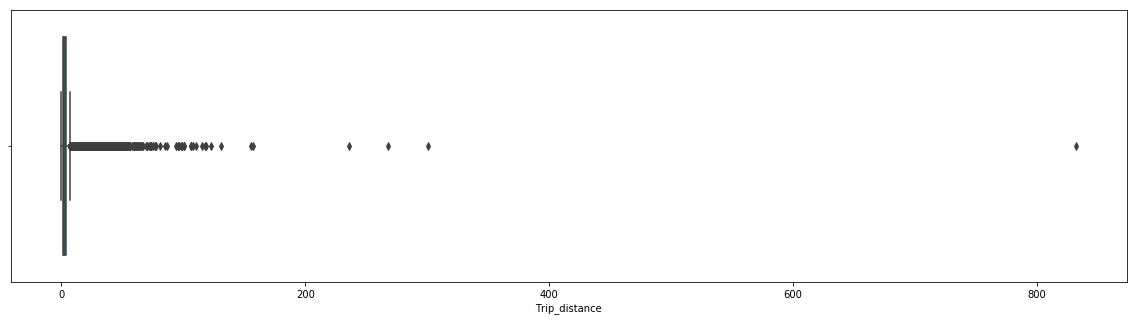

In [99]:
boxplt('Trip_distance')


In [109]:
Green_Taxi_Bk = Green_Taxi.copy()

In [57]:
def quntile(x):
    Q1 = Green_Taxi[x].quantile(0.25)
    Q3 = Green_Taxi[x].quantile(0.75)
    IQR = Q3 - Q1

    filter = (Green_Taxi[x] >= Q1 - 1.5 * IQR) & (Green_Taxi[x] <= Q3 + 1.5 *IQR)
    Test = Green_Taxi.loc[filter]
    return Test

In [ ]:
Green_Taxi= quntile('Trip_distance')

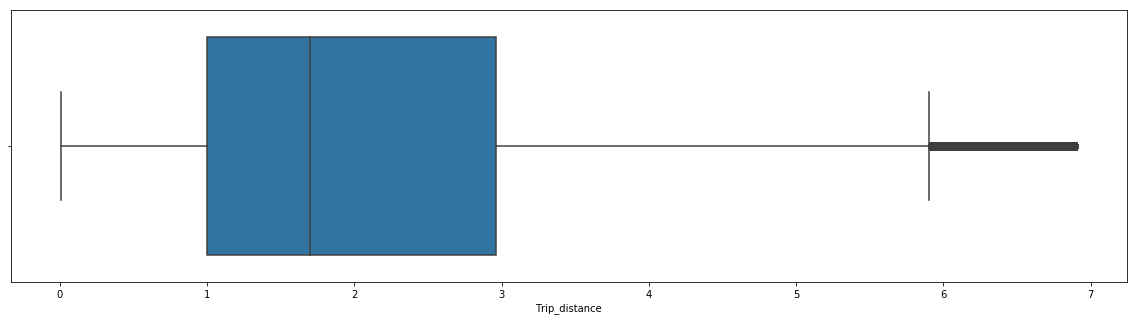

In [113]:
boxplt('Trip_distance')

In [ ]:
#['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude',
#       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
#       'Passenger_count', 'Trip_distance', 'Payment_type', 'Final_Fare_amount',
#       'Trip_Duration'],
#      dtype='object')

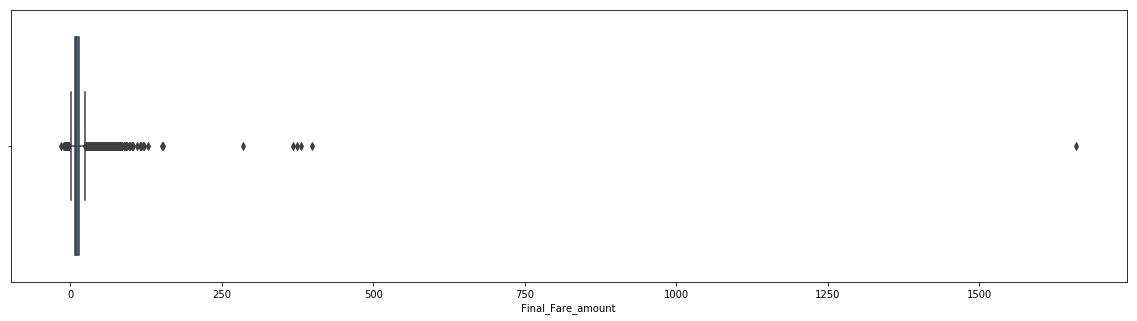

In [121]:
boxplt('Final_Fare_amount')

In [142]:
Green_Taxi= quntile('Final_Fare_amount')


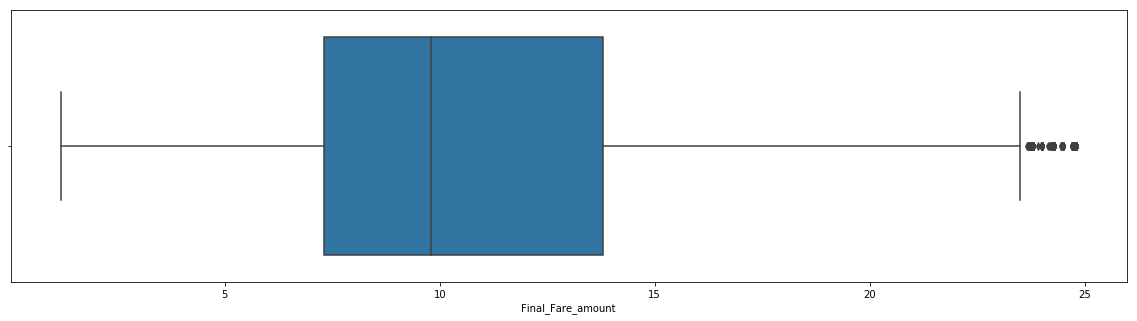

In [143]:
boxplt('Final_Fare_amount')

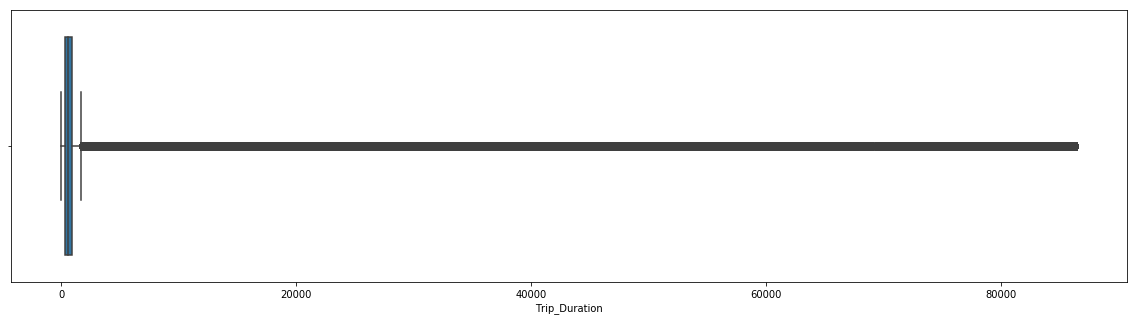

In [144]:
boxplt('Trip_Duration')

In [145]:
Green_Taxi= quntile('Trip_Duration')

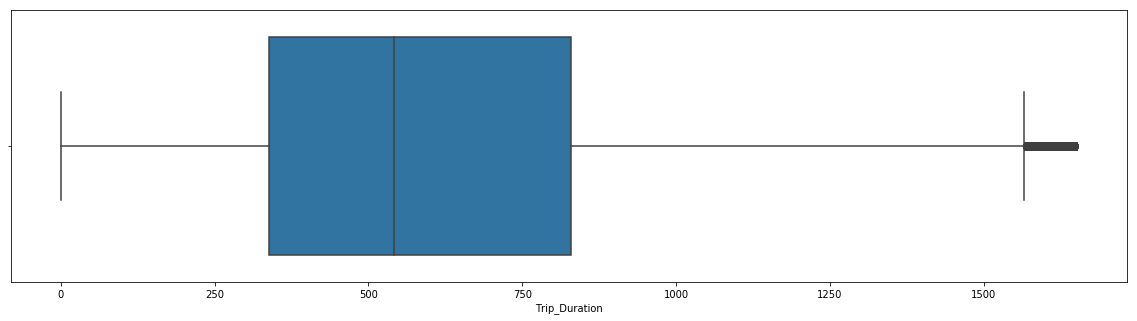

In [146]:
boxplt('Trip_Duration')

In [149]:
Green_Taxi.shape

(7027262, 11)

In [148]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B4.csv',index=False)


<b>Starting the new Phase

In [ ]:
Green_Taxi = pd.read_csv(location+'Green_Taxi_B4.csv')#,date_parser=dateparse)


In [ ]:
Green_Taxi.iloc[:, 0:2] = Green_Taxi.iloc[:, 0:2].apply(pd.to_datetime, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
Green_Taxi['Trip_Duration'] = (Green_Taxi['Lpep_dropoff_datetime'] - Green_Taxi['lpep_pickup_datetime'])
Green_Taxi['Trip_Duration'] = Green_Taxi['Trip_Duration']/np.timedelta64(1,'s')


In [150]:
Green_Taxi[:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.952675,40.723175,-73.923920,40.761379,1,3.56,2,16.8,1179.0


To ensure a higher accuracy we will re-calculate the traveled distance using our own function as well and compare the results

In [356]:
from haversine import haversine

def calc_distance(df):
    pickup = (df['Pickup_latitude'], df['Pickup_longitude'])
    drop = (df['Dropoff_latitude'], df['Dropoff_longitude'])
    return haversine(pickup, drop)


In [358]:
#Calculate distance and assign new column to the dataframe.
Green_Taxi['New_distance'] = Green_Taxi.apply(lambda x: calc_distance(x), axis = 1)


In [359]:
#7874/60/24
Green_Taxi.sort_values(by='Trip_distance', ascending = False)[:10]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Final_Fare_amount,Trip_Duration,month,week,day,hour,New_distance
162875,-73.989761,40.701973,-73.974419,40.759964,1,6.9,23.3,1382.0,1,1,4,15,6.576635
5275084,-73.940201,40.851357,-73.991020,40.766171,1,6.9,22.3,844.0,4,16,23,12,10.393146
2197597,-73.989700,40.702229,-73.956238,40.763748,1,6.9,22.8,1101.0,2,7,19,9,7.398959
7035727,-73.807678,40.699894,-73.741806,40.666935,1,6.9,22.8,1129.0,5,22,31,19,6.654574
6478973,-73.845779,40.754612,-73.805206,40.678421,1,6.9,21.3,607.0,5,20,19,0,9.136123
3503206,-73.990974,40.700054,-73.954262,40.764111,1,6.9,22.3,1257.0,3,11,17,7,7.765492
6633925,-73.917732,40.770069,-73.832878,40.783321,1,6.9,22.3,840.0,5,20,22,10,7.295402
2444376,-73.995689,40.695057,-73.973846,40.613144,1,6.9,24.3,1401.0,2,8,24,8,9.292840
183213,-73.942734,40.720516,-73.987358,40.684711,1,6.9,24.3,1302.0,1,1,4,23,5.477351
2722794,-73.807549,40.699360,-73.864731,40.770309,1,6.9,22.8,985.0,2,9,29,16,9.244089


In [158]:
Green_Taxi['month'] = Green_Taxi.lpep_pickup_datetime.apply(lambda x: x.month)
Green_Taxi['week']  = Green_Taxi.lpep_pickup_datetime.apply(lambda x: x.week)
Green_Taxi['day']   = Green_Taxi.lpep_pickup_datetime.apply(lambda x: x.day)
Green_Taxi['hour']  = Green_Taxi.lpep_pickup_datetime.apply(lambda x: x.hour)


In [397]:
Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Final_Fare_amount,Trip_Duration,month,week,day,hour,New_distance
0,-73.928642,40.680611,-73.924278,40.698044,1,1.46,9.3,612.0,1,53,1,0,1.973094
1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,16.8,1179.0,1,53,1,0,4.890321


In [ ]:
# We thought of creating a new Feature (Speed) that we can use to remove more outtliers and get better results in our model

In [399]:
Green_Taxi['speed']=Green_Taxi['New_distance']/(Green_Taxi['Trip_Duration']/(60*60))

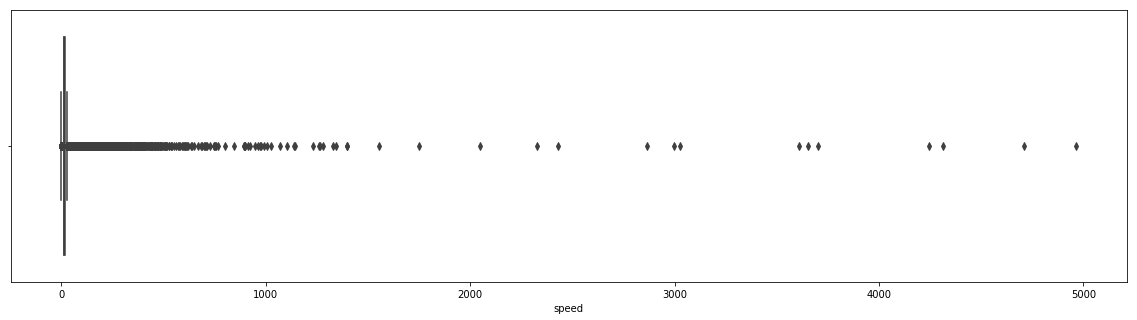

In [401]:
boxplt('speed')

In [402]:
Green_Taxi= quntile('speed')

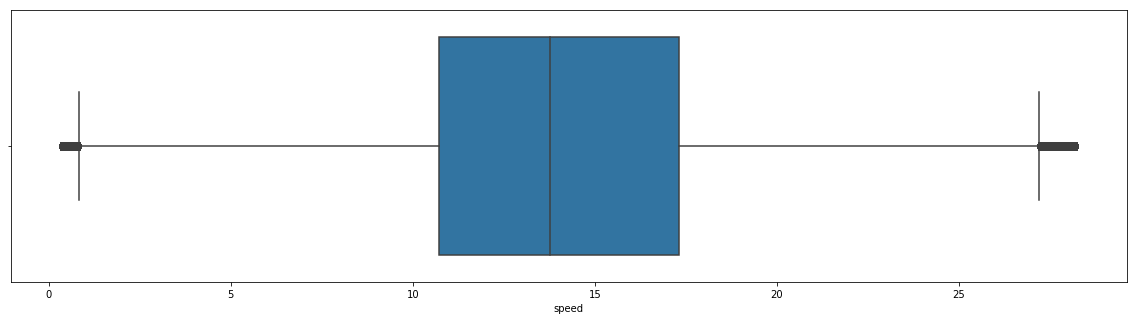

In [58]:
boxplt('speed')

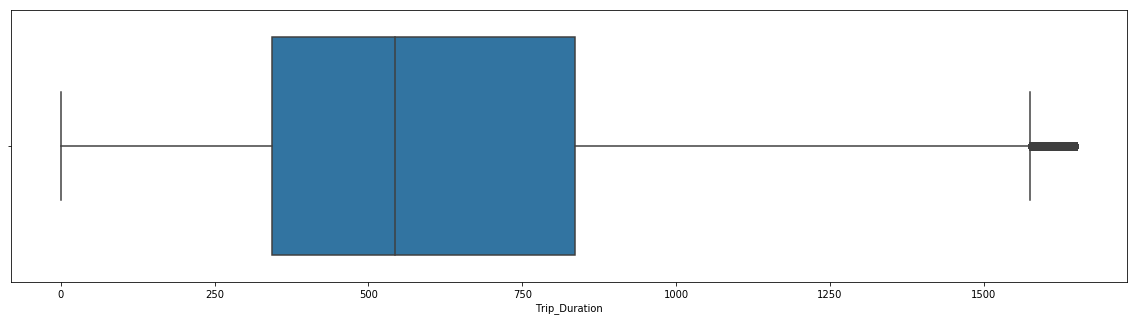

In [59]:
boxplt('Trip_Duration')

In [415]:
Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Final_Fare_amount,Trip_Duration,month,week,day,hour,New_distance,speed
0,-73.928642,40.680611,-73.924278,40.698044,1,1.46,9.3,612.0,1,53,1,0,1.973094,11.606436
1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,16.8,1179.0,1,53,1,0,4.890321,14.932278


In [418]:
(Green_Taxi['Trip_Duration']/60/60).describe()

count    6.777198e+06
mean     1.721539e-01
std      9.796659e-02
min      2.777778e-04
25%      9.527778e-02
50%      1.508333e-01
75%      2.322222e-01
max      4.583333e-01
Name: Trip_Duration, dtype: float64

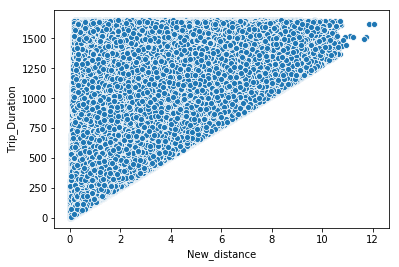

In [411]:
sns.scatterplot(x='New_distance',y='Trip_Duration',data=Green_Taxi)


In [423]:
Green_Taxi['log_New_distance']=np.log(Green_Taxi.New_distance)
Green_Taxi['log_Trip_Duration']=np.log(Green_Taxi.Trip_Duration)

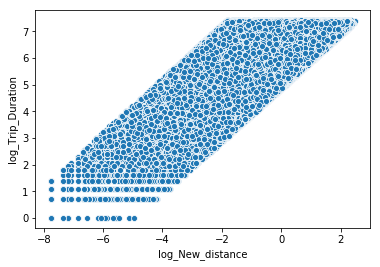

In [60]:
sns.scatterplot(x='log_New_distance',y='log_Trip_Duration',data=Green_Taxi)


In [425]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B5.csv',index=False)


In [161]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map


In [419]:
import folium
from folium.plugins import HeatMap
df_copy = Green_Taxi[Green_Taxi.month>4].copy()
df_copy['count'] = 1
data=df_copy[['Pickup_latitude', 'Pickup_longitude', 'count']].groupby(['Pickup_latitude', 'Pickup_longitude']).sum().reset_index().values.tolist()


In [420]:
base_map = generateBaseMap()
HeatMap(data, radius=8, max_zoom=13).add_to(base_map)

In [421]:
base_map = base_map.add_child(folium.ClickForMarker(popup='Potential Location'))

In [422]:
base_map.save('E:/Big Data Diploma/Project/Project/HeatMap.html')


In [90]:
df_hour_list = []
for hour in df_copy.hour.sort_values().unique():
    df_hour_list.append(df_copy.loc[df_copy.hour == hour, ['pickup_latitude', 'pickup_longitude', 'count']].groupby(['pickup_latitude', 'pickup_longitude']).sum().reset_index().values.tolist())


In [91]:
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)


In [92]:
base_map.save('E:/Big Data Diploma/Project/Project/HeatMap2.html')


In [ ]:
############  Test Machine Learning

In [3]:
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"

In [4]:
Green_Taxi = pd.read_csv(location+'Green_Taxi_B5.csv')#,date_parser=dateparse)

In [ ]:
#Green_Taxi = Green_Taxi.drop(columns=['lpep_pickup_datetime','Lpep_dropoff_datetime','Payment_type'])


In [5]:
Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Final_Fare_amount,Trip_Duration,month,week,day,hour,New_distance,speed,log_New_distance,log_Trip_Duration
0,-73.928642,40.680611,-73.924278,40.698044,1,1.46,9.3,612.0,1,53,1,0,1.973094,11.606436,0.679603,6.416732
1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,16.8,1179.0,1,53,1,0,4.890321,14.932278,1.587258,7.072422


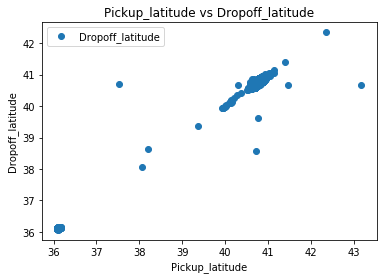

In [171]:
Green_Taxi.plot(x='Pickup_latitude', y='Dropoff_latitude', style='o')  
plt.title('Pickup_latitude vs Dropoff_latitude')  
plt.xlabel('Pickup_latitude')  
plt.ylabel('Dropoff_latitude')  
plt.show()


In [426]:
Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Final_Fare_amount,Trip_Duration,month,week,day,hour,New_distance,speed,log_New_distance,log_Trip_Duration
0,-73.928642,40.680611,-73.924278,40.698044,1,1.46,9.3,612.0,1,53,1,0,1.973094,11.606436,0.679603,6.416732
1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,16.8,1179.0,1,53,1,0,4.890321,14.932278,1.587258,7.072422


In [8]:
# There are several machine learning models that we would like to create.
# one to predict the distance
# one to predict the Final_Fare_amount
# one to predict the Trip_Duration

# To increase accuracy, we will provide the user predictions based on the nearest let the user coordinates 



#feature_names = ['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Trip_distance','speed','log_New_distance','log_Trip_Duration','month','week','day','hour']
feature_names = ['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','New_distance','log_New_distance','month','week','day','hour']

X = Green_Taxi[feature_names]#.values.reshape(-1,1)
y = Green_Taxi['Trip_Duration']


In [ ]:
# https://www.kaggle.com/nitin194/nyc-taxi-trip-duration-prediction
# We can use other ways to do feature engineering like the Pvalues


In [528]:
X[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,New_distance,log_New_distance,month,week,day,hour
0,-73.928642,40.680611,-73.924278,40.698044,1.973094,0.679603,1,53,1,0
1,-73.952675,40.723175,-73.923920,40.761379,4.890321,1.587258,1,53,1,0


In [9]:
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog = X).fit()


In [11]:
#Fetch p values for each feature
p_Vals = regressor_OLS.pvalues

#define significance level for accepting the feature.
sig_Level = 0.05


In [23]:
### https://www.kaggle.com/nitin194/nyc-taxi-trip-duration-prediction
### Very important to read as the X_opt will be later used with the below command
### X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_opt,Y, random_state=4, test_size=0.2)

#Loop to iterate over features and remove the feature with p value less than the sig_level
while max(p_Vals) > sig_Level:
    print("Probability values of each feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " dimensions remaining now... \n")
    regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
else:
    print ('no Feature index removed')
    
print("Final stat summary with optimal features")
regressor_OLS.summary()


no
Final stat summary with optimal features


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Trip_Duration   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 7.226e+06
Date:                Sat, 04 Jan 2020   Prob (F-statistic):               0.00
Time:                        00:16:32   Log-Likelihood:            -4.5816e+07
No. Observations:             6777198   AIC:                         9.163e+07
Df Residuals:                 6777188   BIC:                         9.163e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pickup_longitude    425.7984      3.602    118.215      0.000     418.739     432.858
Pickup_latitude    -341.5240      4.168    -81.948      0.000    -349.692    -333.356
Dropoff_longitude  -447.4861      3.603   -124.213      0.000    -454.547    -440.425
Dropoff_latitude    306.9132      4.163     73.720      0.000     298.753     315.073
New_distance        132.8500      0.118   1125.013      0.000     132.619     133.081
log_New_distance    106.2039      0.262    405.718      0.000     105.691     106.717
month                 6.5500      0.064    101.580      0.000       6.424       6.676
week                 -0.7401      0.012    -60.261      0.000      -0.764      -0.716
day                   0.1348      0.009     14.700      0.000       0.117       0.153
hour                  1.8772      0.012    154.875      0.000       1.853       1.901
==============================================================================
Omnibus:                  1702326.730   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4822248.190
Skew:                           1.327   Prob(JB):                         0.00
Kurtosis:                       6.167   Cond. No.                     9.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Finally we have reached the combination of optimum features with each feature having p value < 0.05.


In [42]:
from sklearn.preprocessing import MinMaxScaler
# Splitting the normal features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
# Principal Component Analysis

In [26]:
#Split Data
#Lets split our data first before scaling the features

from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,y, random_state=4, test_size=0.2)

In [31]:
#Scale Data
#It is suggested to scale the input varibles first before applying PCA to standardise
#the variance and avoid the bias. Lets Scale the data using StandardScaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

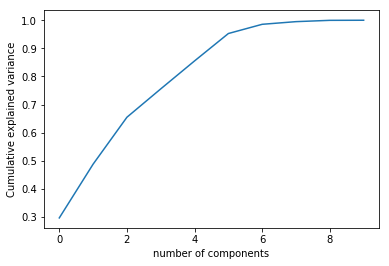

In [33]:
#PCA application
#Let's apply PCA technique on the training features to understand how many principal components
#should we select for our model to capture atleast 90% variance. For that we will take help of plot and cumsum function of numpy package.

from sklearn.decomposition import PCA
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.show()


In [34]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))


[(1, 29.69),
 (2, 48.81),
 (3, 65.5),
 (4, 75.58),
 (5, 85.53),
 (6, 95.27),
 (7, 98.55),
 (8, 99.5),
 (9, 99.96)]

In [35]:
pca_9 = PCA(n_components=9)
X_train_pca = pca_9.fit_transform(X_train_pca)
X_test_pca = pca_9.transform(X_test_pca)


In [36]:
#Correlation Analysis
#Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.


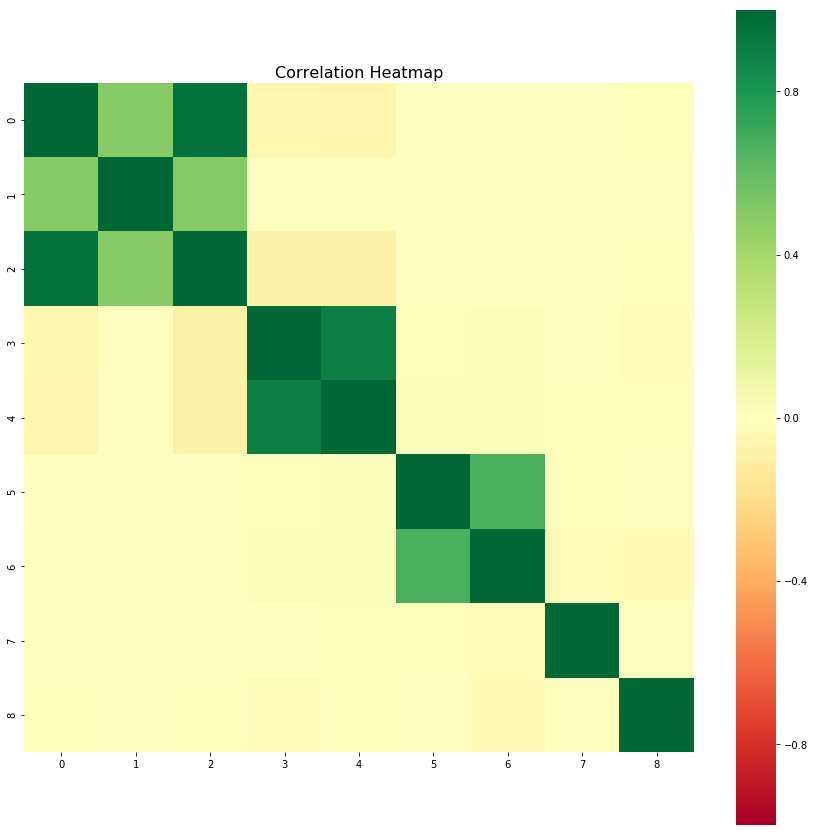

In [44]:
#Heatmap
#A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship 
#between different values.
#Let's plot the relationship between the features of the Feature selection group first

plt.figure(figsize=(15,15))
corr = pd.DataFrame(X_train[:,1:]).corr()
corr.index = pd.DataFrame(X_train[:,1:]).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


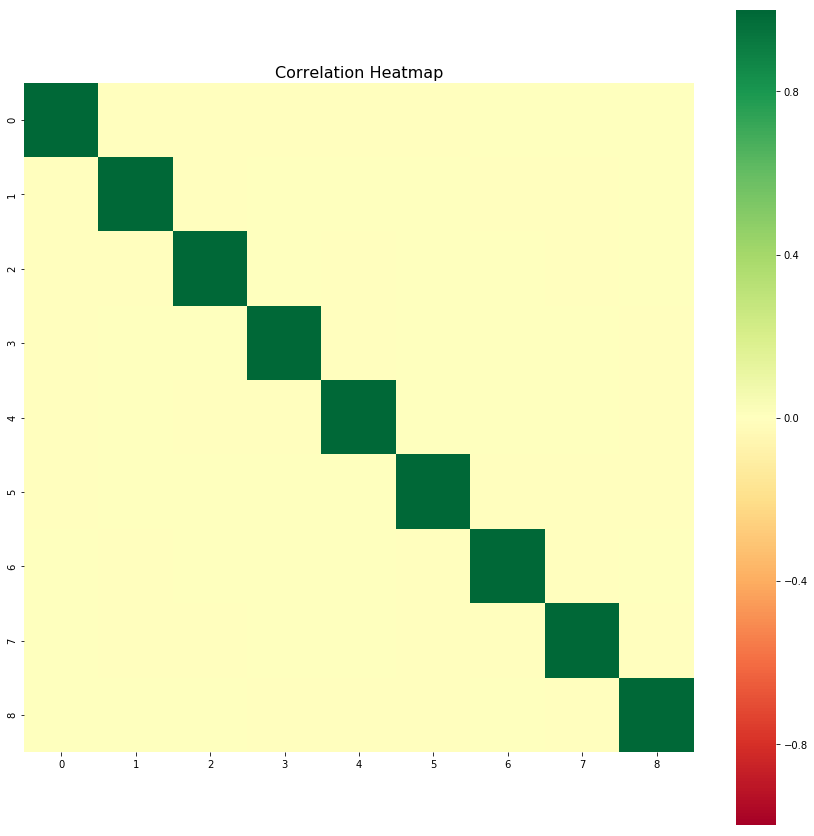

In [47]:
plt.figure(figsize=(15,15))
corr = pd.DataFrame(X_train_pca).corr()
corr.index = pd.DataFrame(X_train_pca).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [ ]:
# Plan before I sleep, To predict the Trip_distance from the coordinates
# then predict Trip_Duration & The amount
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [48]:
#Linear regressor for the Feature extraction group
regressor2 = LinearRegression() 
regressor2.fit(X_train_pca,y_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y_pred = regressor.predict(X_test)
y_pred_pca = regressor2.predict(X_test_pca) 


In [66]:
from sklearn import metrics
#Evaluate the regressor on the raw data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE score for the Multiple LR raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('Variance score for the Multiple LR raw is : %.2f' % regressor.score(X_test, y_test))
print("\n")

#Evaluate the regressor on the Feature extraction group
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_pca,y_pred_pca))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pca,y_pred_pca))
print('RMSE score for the Multiple LR PCA is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca,y_pred_pca))))
print('Variance score for the Multiple LR PCA is : %.2f' % regressor2.score(X_test_pca, y_test_pca))
print("\n")

Mean Absolute Error: 268.78465248406417
Mean Squared Error: 112697.72051950953
RMSE score for the Multiple LR raw is : 335.70481158230297
Variance score for the Multiple LR raw is : 0.09


Mean Absolute Error: 154.49282427181743
Mean Squared Error: 43663.78078624522
RMSE score for the Multiple LR PCA is : 208.95880164818428
Variance score for the Multiple LR PCA is : 0.65




<B>We will now try to improve our accuraccy:</B>
    <br>1. Cross Validation
    <br>2. Grid Search
    <br>3. Different algorithms
    <br>4. Ensemble learning


In [497]:
#### Try Cross Validation also try different Grid Search, Different algorithms, Ensumbled learning

In [75]:
from sklearn.linear_model import RidgeCV
regressor = RidgeCV(alphas=[0.01,0.1,1, 1e3, 1e6], store_cv_values=True)
regressor2 = RidgeCV(alphas=[0.01,0.1,1, 1e3, 1e6], store_cv_values=True)


In [76]:
regressor.fit(X_train, y_train)
regressor2.fit(X_test_pca, y_test_pca)


RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+03, 1.e+06]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

In [77]:
# Best alpha
print(regressor.alpha_)
print(regressor2.alpha_)

0.01
1.0


In [78]:
cv_mse_R = np.mean(regressor.cv_values_, axis=0)
print('Mean Squared Error:', cv_mse_R)

cv_mse_PCA = np.mean(regressor2.cv_values_, axis=0)
print('Mean Squared Error:', cv_mse_PCA)


Mean Squared Error: [ 43413.68008454  43415.61734184  43456.23966037  43629.69157105
 107736.15215022]
Mean Squared Error: [43664.63173943 43664.63173926 43664.63173765 43664.70420398
 50563.55725352]


In [80]:
print('Root Mean Squared Error:', np.sqrt(cv_mse_R))
print('Root Mean Squared Error PCA:', np.sqrt(cv_mse_PCA))


Root Mean Squared Error: [208.35949723 208.36414601 208.46160236 208.8772165  328.23185731]
Root Mean Squared Error PCA: [208.96083781 208.96083781 208.96083781 208.96101121 224.86341911]


In [ ]:
predict_y = regressor.predict(X_test)


<br>
<b>Let's try to use GridSearch to tune the hyperparameters of random forest regressor to get the best possible test score.<br><br>

In [ ]:
regressor.fit(X_train, y_train)
regressor2.fit(X_test_pca, y_test_pca)


In [89]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_jobs=-1)

# #instantiate the object for the Random Forest Regressor with tuned hyper parameters for Feature Selection Group
# regressor_rf1 = RandomForestRegressor(n_estimators = 26,
#                                      max_depth = 22,
#                                      min_samples_split = 9,
#                                      n_jobs=-1)

#instantiate the object for the Random Forest Regressor for Feature Extraction Group
regressor_rf_PCA = RandomForestRegressor(n_jobs=-1)

regressor_rf.fit(X_train, y_train)
regressor_rf_PCA.fit(X_train_pca, y_train_pca)


print("\n")


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [91]:
y_pred_rf = regressor_rf.predict(X_test)
y_pred_rf_PCA = regressor_rf_PCA.predict(X_test_pca)

print("\n")


In [98]:
#Evaluate the model with default RF
print('RMSE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))))
print('RMSLE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_rf))))
print('Variance score for the RF regressor raw is : %.2f' % regressor_rf.score(X_test, y_test))

print("\n")

#Evaluate the model with Random Forest PCA
print('RMSE score for the RF regressor is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_rf_PCA))))
print('RMSLE score for the RF regressor is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test_pca, y_pred_rf_PCA))))
print('Variance score for the RF regressor is : %.2f' % regressor_rf_PCA.score(X_test_pca, y_test_pca))

RMSE score for the RF regressor raw is : 262.0613505201993
RMSLE score for the RF regressor raw is : 0.49606798141997505
Variance score for the RF regressor raw is : 0.45


RMSE score for the RF regressor is : 186.36488239183288
RMSLE score for the RF regressor is : 0.34667232370857304
Variance score for the RF regressor is : 0.72


*****************
<b> Let's try working with Boosters as well </b>
<br>
*****************

In [103]:
# XGBoost Regressor
# We used GridSearch to tune the hyperparameters of XGBoost regressor to get the best possible test score.
# We will compare results from the default regressor and the tuned regressor.
from xgboost import XGBRegressor

In [104]:
regressor_xgb = XGBRegressor(n_jobs=-1)
regressor_xgb_PCA = XGBRegressor(n_estimators=300,
                            learning_rate=0.08,
                            gamma=0,
                            subsample=0.75,
                            colsample_bytree=1,
                            max_depth=7,
                            min_child_weight=4,
                            silent=1,
                           n_jobs=-1)


In [105]:
regressor_xgb.fit(X_train,y_train)
regressor_xgb_PCA.fit(X_train_pca,y_train_pca)
print("\n")


C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:27:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:27:57] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.




In [106]:
y_pred_xgb = regressor_xgb.predict(X_test)
y_pred_xgb_pca = regressor_xgb_PCA.predict(X_test_pca)
print("\n")


In [108]:
#Evaluate the model with default params for raw data
print('RMSE score for the XGBoost regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb))))
print('Variance score for the XGBoost regressor raw is : %.2f' % regressor_xgb.score(X_test, y_test))
print("\n")

#Evaluate the model with PCA params  for Feature Extraction Group
print('RMSE score for the XGBoost regressor2 is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_xgb_pca))))
print('Variance score for the XGBoost regressor2 is : %.2f' % regressor_xgb_PCA.score(X_test_pca, y_test_pca))


RMSE score for the XGBoost regressor raw is : 215.6374307002365
Variance score for the XGBoost regressor raw is : 0.63


RMSE score for the XGBoost regressor2 is : 183.76446075829568
Variance score for the XGBoost regressor2 is : 0.73


In [ ]:
# We can also do CV if we have the capacity to do so
# Next step to do the same for the trip pridiction
